In [19]:
import numpy as np
import pandas as pd
from sklearn import datasets, ensemble, model_selection, metrics
from sklearn import tree

from matplotlib import pyplot as plt

In [13]:
data, target = datasets.load_digits(as_frame=True, return_X_y=True)

In [16]:
data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [18]:
data.shape, target.shape

((1797, 64), (1797,))

Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score. Эта величина и будет ответом в пункте 1.

In [38]:
%%time
estimator = tree.DecisionTreeClassifier()
scores = model_selection.cross_val_score(estimator, data, target, cv=10, n_jobs=-1)

Wall time: 151 ms


In [36]:
%%time
estimator = tree.DecisionTreeClassifier()
scores = model_selection.cross_val_score(estimator, data, target, cv=10)

Wall time: 230 ms


In [39]:
scores.mean()

0.8246865301055244

Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100. 

Качество классификации новой модели - ответ в пункте 2. Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.

In [40]:
bagging_estimator = ensemble.BaggingClassifier(estimator, n_estimators=100)
bag_scores = model_selection.cross_val_score(bagging_estimator, data, target, cv=10, n_jobs=-1)
bag_scores.mean()

0.925943513345748

Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на крорень из d случайных признаков. Качество работы получившегося классификатора - ответ в пункте 3. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [50]:
bagging_estimator_2 = ensemble.BaggingClassifier(estimator, n_estimators=100, max_features=int(np.sqrt(data.shape[1])))
bag_scores_2 = model_selection.cross_val_score(bagging_estimator_2, data, target, cv=10)
bag_scores_2.mean()

0.9265394165114834

Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же корень из признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.

In [54]:
estimator_modified = tree.DecisionTreeClassifier(max_features=int(np.sqrt(data.shape[1])))
estimator_beg_mod = ensemble.BaggingClassifier(estimator_modified, n_estimators=100)
score_beg_mod = model_selection.cross_val_score(estimator_beg_mod, data, target, cv=10, n_jobs=-1)
score_beg_mod.mean()

0.9488019863438858

Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно. 

In [55]:
estimator_RandForest = ensemble.RandomForestClassifier(n_estimators=100)
scores_RF = model_selection.cross_val_score(estimator_RandForest, data, target, cv=10, n_jobs=-1)
scores_RF.mean()

0.944891371818746

На основе наблюдений выпишите через пробел номера правильных утверждений из приведенных ниже в порядке возрастания номера (это будет ответ в п.5)

1) Случайный лес сильно переобучается с ростом количества деревьев

2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев

3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.

6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).

In [68]:
%%time
param_grid = {'n_estimators': [5, 10, 15, 50, 100, 200], 'max_depth': [5, None], 'max_features': [5, 10, 40, 50]}
base_estimator = ensemble.RandomForestClassifier(random_state=0)
sh = model_selection.GridSearchCV(base_estimator, param_grid, cv=5).fit(data, target)

Wall time: 1min 10s


In [123]:
%%time
param_grid = {'n_estimators': [5, 10, 15, 100, 150, 200, 250], 'max_depth': [5, None], 'max_features': [5, 10, 40, 50]}
base_estimator = ensemble.RandomForestClassifier(random_state=0)
sh = model_selection.GridSearchCV(base_estimator, param_grid, cv=5, n_jobs=-1).fit(data, target)

Wall time: 33.1 s


In [124]:
prity = pd.DataFrame(sh.cv_results_)

In [127]:
def plot_scores(df, ax):
    for i in [5, 10, 40, 50]:
        ax.plot(df[df['param_max_features'] == i]['param_n_estimators'], df[df['param_max_features'] == i]['mean_test_score'], marker='o', label=i)
    ax.legend
    ax.legend(loc='lower right', title='max_features')
    ax.set_xlabel("n_estimators")
    ax.set_ylabel("score")
    

<Figure size 1440x360 with 0 Axes>

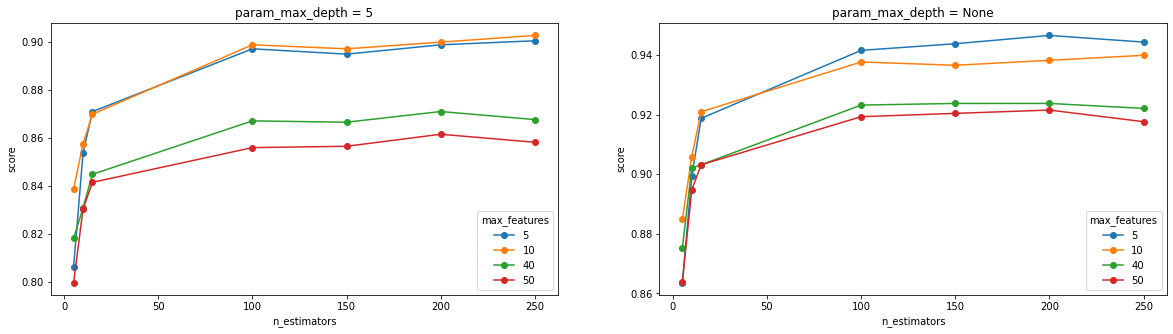

In [128]:
plt.figure(figsize=(20, 5))

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

df5 = prity[prity['param_max_depth'] == 5]
plot_scores(df5, ax0)
ax0.set_title('param_max_depth = 5')

dfNone = prity[prity['param_max_depth'] != 5]
plot_scores(dfNone, ax1)
ax1.set_title('param_max_depth = None')

plt.show()